$$
\Large\text{CV \& NLP LAB Exam}
$$

#### Q1. Image Filtering (10 Marks)
1. Read a sample image.
2. Apply the folloiwng filters:
    - Median filter with a kernel size of 5x5.
    - Gaussian filter with a kernel size of 5x5 and standard deviation of 1.
3. Display the origianl image and the filtered image side by side.
4. Save both filtere images to separate files.

In [1]:
import cv2
import matplotlib.pyplot as plt 

import warnings
warnings.filterwarnings("ignore")

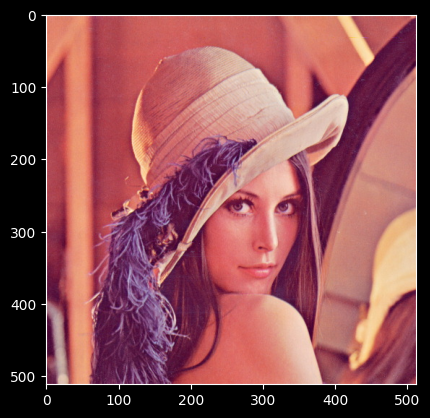

In [2]:
img = cv2.imread('inputs/sample.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

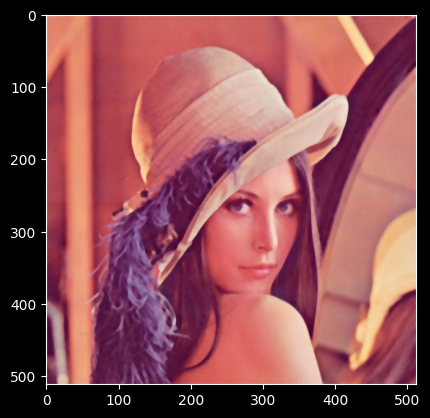

In [3]:
# Meadian filter with kernal size of 5x5
median_filtered_img = cv2.medianBlur(img, 5)
plt.imshow(cv2.cvtColor(median_filtered_img, cv2.COLOR_BGR2RGB))

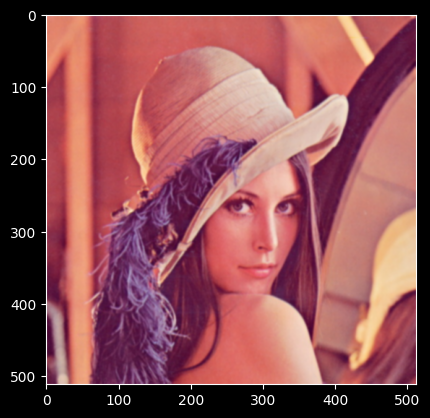

In [4]:
# Gaussian filter -> kernel=5x5 and SD=1
gaussian_filtered_img = cv2.GaussianBlur(img, (5, 5), 1)
plt.imshow(cv2.cvtColor(gaussian_filtered_img, cv2.COLOR_BGR2RGB))

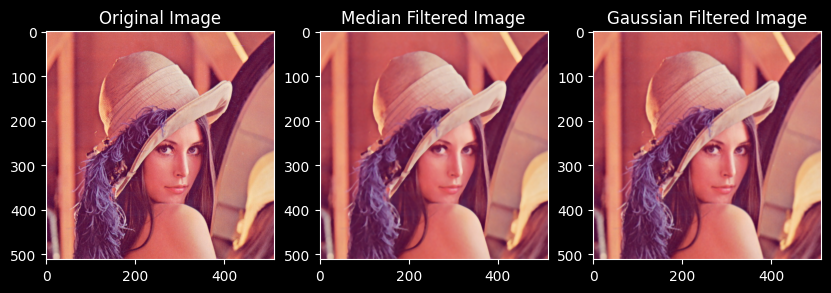

In [5]:
plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(1,3,2)
plt.title('Median Filtered Image')
plt.imshow(cv2.cvtColor(median_filtered_img, cv2.COLOR_BGR2RGB))
plt.subplot(1,3,3)
plt.title('Gaussian Filtered Image')
plt.imshow(cv2.cvtColor(gaussian_filtered_img, cv2.COLOR_BGR2RGB))
plt.show()


In [6]:
# Save both filtered images to separate files
cv2.imwrite('./outputs/median_filtered_image.jpg', median_filtered_img)
cv2.imwrite('./outputs/gaussian_filtered_image.jpg', gaussian_filtered_img)


True

#### Q2. Edge Detection (10 Marks)
1. Read a sample image and convert it to grayscale.
2. Apply the Sobel operator to detect vertical and horizontal edges in the image.
3. Combine the vertical and horizontal edges into a single edge-detected image.
4. Display the original grayscale image and the edge-detected image side by side.
5. Save the edge-detected image to a file.

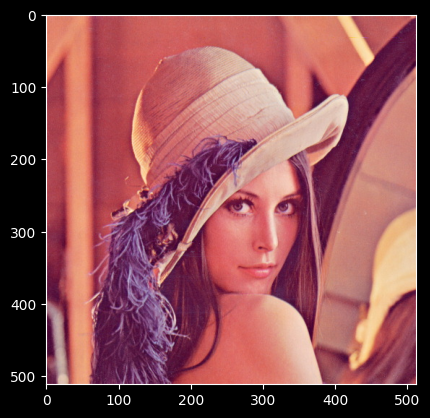

In [7]:
img = cv2.imread('inputs/sample.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_RGB2BGR))

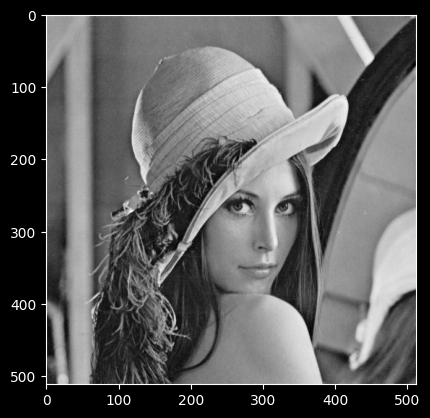

In [8]:
# Converting into grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img, cmap='gray')

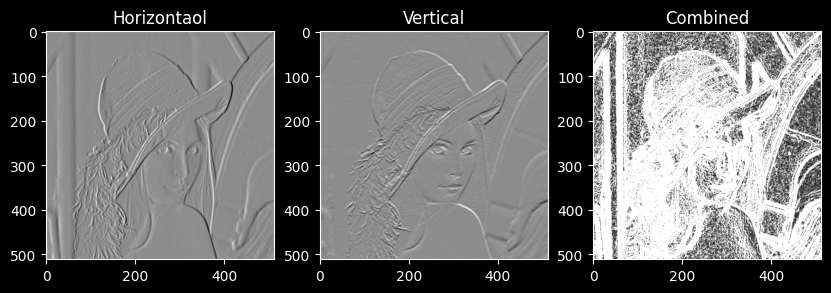

In [9]:
# Detect vertical and horizontal edges
sobel_x = cv2.Sobel(gray_img, cv2.CV_64F, 1, 0, ksize=5)  
sobel_y = cv2.Sobel(gray_img, cv2.CV_64F, 0, 1, ksize=5)  

# Combine the vertical and horizontal
sobel_combined = cv2.bitwise_or(cv2.convertScaleAbs(sobel_x), cv2.convertScaleAbs(sobel_y))

# Plotting
plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.title('Horizontaol')
plt.imshow(sobel_x, cmap='gray')
plt.subplot(1,3,2)
plt.title('Vertical')
plt.imshow(sobel_y, cmap='gray')
plt.subplot(1,3,3)
plt.title('Combined')
plt.imshow(sobel_combined, cmap='gray')
plt.show()

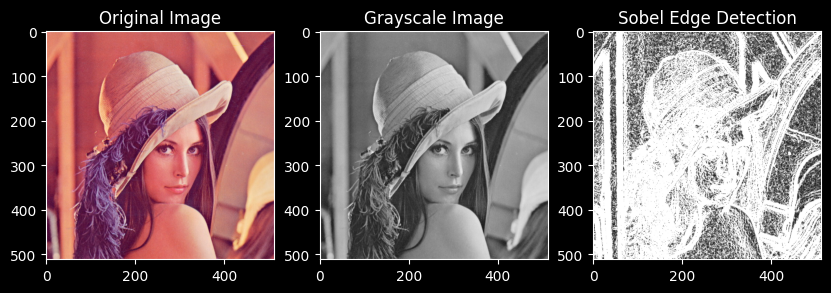

In [10]:
# Plotting it all togetcher 
plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
plt.subplot(1,3,2)
plt.title('Grayscale Image')
plt.imshow(cv2.cvtColor(gray_img, cv2.COLOR_GRAY2BGR))
plt.subplot(1,3,3)
plt.title('Sobel Edge Detection')
plt.imshow(cv2.cvtColor(sobel_combined, cv2.COLOR_GRAY2BGR))
plt.show()


In [11]:
# Saving the file
cv2.imwrite('outputs/sobel_detected_image.jpg', sobel_combined)

True

#### Q3. Text Preprocessing and Word Embeddings (10 Marks)
1. Write Python code to preprocess a sample.txt file for NLP tasks:  
    - Tokenization 
    - Removing punctuation    
    - Converting text to lowercase 
    - Removing stop words 
    - Lemmatization    
2. Perform Word2Vec embedding on the preprocessed text and display the word embeddings for any five unique words.  
3. Save the word embeddings to a .csv file.   



In [12]:
import nltk
import pandas as pd
from nltk.tokenize import word_tokenize
from spire.doc import Document 
from string import punctuation
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from gensim.models import Word2Vec
 
nltk.download('punkt') 
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to /home/dai/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/dai/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/dai/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /home/dai/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [13]:
document = Document()
document.LoadFromFile('inputs/sample.txt.docx')

text = document.GetText()
print(text)

Evaluation Warning: The document was created with Spire.Doc for Python.


The names "John Doe" for males, "Jane Doe" or "Jane Roe" for females, or "Jonnie Doe" and "Janie Doe" for children, or just "Doe" non-gender-specifically are used as placeholder names for a party whose true identity is unknown or must be withheld in a legal action, case, or discussion. The names are also used to refer to acorpse or hospital patient whose identity is unknown. This practice is widely used in the United States and Canada, but is rarely used in other English-speaking countries including the United Kingdom itself, from where the use of "John Doe" in a legal context originates. The names Joe Bloggs or John Smith are used in the UK instead, as well as in Australia and New Zealand.

John Doe is sometimes used to refer to a typical male in other contexts as well, in a similar manner to John Q. Public, known in Great Britain as Joe Public, John Smith or Joe Bloggs. For example, the first name listed on a f

In [14]:
# Text Processing
wnl = WordNetLemmatizer()

def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)

    # Removing punctuation
    tokens = [word for word in tokens if word.isalnum()]

    # Converting text to lowercase
    tokens = [word.lower() for word in tokens]

    # Removing stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatizing words
    tokens = [wnl.lemmatize(word) for word in tokens]

    return ' '.join(tokens)

preprocessed_text = preprocess_text(text)
preprocessed_text

'evaluation warning document created python name john doe male jane doe jane roe female jonnie doe janie doe child doe used placeholder name party whose true identity unknown must withheld legal action case discussion name also used refer acorpse hospital patient whose identity unknown practice widely used united state canada rarely used country including united kingdom use john doe legal context originates name joe bloggs john smith used uk instead well australia new zealand john doe sometimes used refer typical male context well similar manner john q public known great britain joe public john smith joe bloggs example first name listed form often john doe along fictional address fictional information provide example fill form name also used frequently popular culture example frank capra film meet john doe john doe also name 2002 american television series similarly child baby whose identity unknown may referred baby doe notorious murder case kansa city missouri referred baby victim pr

In [15]:
word2vec_model = Word2Vec(
    sentences=[word_tokenize(preprocessed_text)], 
    vector_size=100, 
    window=5, 
    min_count=1, 
    workers=4
)


In [16]:
# Showing the embeddig of 5 words
df = pd.DataFrame(
    word2vec_model.wv.vectors,
    index=word2vec_model.wv.index_to_key
)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
doe,-0.000588,0.000378,0.005115,0.008968,-0.009209,-0.007461,0.006694,0.009336,-0.005023,-0.003928,...,0.001819,0.000223,0.003492,0.000148,0.009901,0.005050,-0.008795,-0.007188,0.000893,0.006356
john,-0.008625,0.003820,0.005181,0.005681,0.007606,-0.006493,0.001289,0.006375,-0.002817,-0.006350,...,0.001213,-0.001545,0.002217,-0.007947,-0.002455,0.002631,0.005428,-0.002503,-0.009533,0.004423
used,0.000093,0.003141,-0.006818,-0.001398,0.007744,0.007216,-0.003586,0.002786,-0.008323,0.006138,...,-0.004447,0.005714,0.009201,-0.004124,0.008084,0.005369,0.005903,0.000448,0.008201,-0.007051
name,-0.008313,0.009509,-0.000214,-0.001989,0.004743,-0.004492,0.002969,0.007391,0.006073,-0.007742,...,-0.007321,-0.001036,-0.000763,-0.002643,0.010031,-0.000504,0.005974,-0.007652,-0.002538,-0.005626
unknown,-0.007160,0.001293,-0.007173,-0.002256,0.003758,0.005745,0.001279,0.002212,-0.004114,0.007173,...,0.003175,-0.004697,0.005301,-0.004248,0.002724,-0.008037,0.006258,0.004778,0.000800,0.002992


In [17]:
# Save the word embeddings to a .csv file
df.to_csv('outputs/word_embeddings.csv')

#### Q4. Sentiment Analysis (10 Marks)
1. Load a dataset IMDB Dataset.csv with two columns:
    - Review: Text content of the review.
    - Sentiment: Label (Positive/Negative).
2. Preprocess the dataset:
    - Clean the text (removing special characters, converting to lowercase).
    - Perform tokenization and padding.
3. Build a binary classification model for sentiment analysis using one of the following algorithms:
    - Logistic Regression
    - Naive Bayes
4. Save the predictions to a file (predictions.csv).
5. Evaluate your model and display the accuracy and confusion matrix.


In [18]:
import re
import nltk
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer


In [19]:
df = pd.read_csv('inputs/IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [20]:
stop_words = set(stopwords.words('english'))
list(stop_words)[:5]

['s', 'over', 'had', 'you', 'only']

In [21]:
# Removing the special charater and converting it into lower case
def clean_text(text):
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  
    text = text.lower()
    return text

In [22]:
def remove_stopwords(text):
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

In [23]:
# Apply the cleaning function to the review column
df['review'] = df['review'].apply(clean_text)
df['review'] = df['review'].apply(remove_stopwords)

In [24]:
def sentiment_to_int(sentiment):
    if sentiment == 'positive':
        return 1
    else:
        return 0

In [25]:
# ocnverting the sentiment to numeric column
df['sentiment'] = df['sentiment'].apply(sentiment_to_int)

In [26]:
# Splitting hte dataset
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size=0.2, random_state=24)

In [27]:
def int_to_sentiment(sentiment):
    if sentiment == 1:
        return 'positive'
    else:
        return 'negative'

$$\text{Logistic Regression}$$

In [28]:
# Linae regression
pipeline_lr = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('model', LogisticRegression(
        solver='liblinear'
    ))
])
pipeline_lr.fit(X_train, y_train)
y_pred_lr = pipeline_lr.predict(X_test)

In [29]:
# Prediction
predictions_lr = pd.DataFrame({'Review': X_test,'Sentiment_true':y_test, 'Sentiment_pred': y_pred_lr})
predictions_lr['Sentiment_true'] = predictions_lr['Sentiment_true'].apply(int_to_sentiment)
predictions_lr['Sentiment_pred'] = predictions_lr['Sentiment_pred'].apply(int_to_sentiment)
predictions_lr.head()

,Review,Sentiment_true,Sentiment_pred
11022,many animation buffs consider wladyslaw starew...,positive,positive
7940,film entertain lots laughs actors kept film mo...,negative,negative
30599,animation reimagining peter wolf excellent 29 ...,negative,negative
12942,great show make cry group people really loved ...,positive,positive
32515,great tv miniseries classic novel janet mcteer...,positive,positive


In [30]:
# Saving the result
predictions_lr.to_csv('outputs/predictions_lr.csv', index=False)

In [31]:
# Evaluation
accuracy_lr = accuracy_score(y_test, y_pred_lr)
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)

print(f'Logistic Regression Accuracy: {accuracy_lr*100:.2f}%')
print(f'Logistic Regression Confusion Matrix:\n{conf_matrix_lr}')


Logistic Regression Accuracy: 89.92%
Logistic Regression Confusion Matrix:
[[4456  595]
 [ 413 4536]]


$$\text{Naive Bayes}$$

In [32]:
# Create pipeline for naive bayes
pipeline_nb = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('model', MultinomialNB())
])
pipeline_nb.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('model', MultinomialNB())])

In [33]:
# predictions
y_pred_nb = pipeline_nb.predict(X_test)

In [34]:
# save Prediction
predictions_nb = pd.DataFrame({'Review': X_test,'Sentiment_true':y_test, 'Sentiment_pred': y_pred_lr})
predictions_nb['Sentiment_true'] = predictions_nb['Sentiment_true'].apply(int_to_sentiment)
predictions_nb['Sentiment_pred'] = predictions_nb['Sentiment_pred'].apply(int_to_sentiment)
predictions_nb.head()


,Review,Sentiment_true,Sentiment_pred
11022,many animation buffs consider wladyslaw starew...,positive,positive
7940,film entertain lots laughs actors kept film mo...,negative,negative
30599,animation reimagining peter wolf excellent 29 ...,negative,negative
12942,great show make cry group people really loved ...,positive,positive
32515,great tv miniseries classic novel janet mcteer...,positive,positive


In [35]:
# Save the model
predictions_nb.to_csv('outputs/predictions_nb.csv', index=False)

In [36]:
# Evaluate Naive Bayes
accuracy_nb = accuracy_score(y_test, y_pred_nb)
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)

print(f'Naive Bayes Accuracy: {accuracy_nb*100:.2f}%')
print(f'Naive Bayes Confusion Matrix:\n{conf_matrix_nb}')

Naive Bayes Accuracy: 86.96%
Naive Bayes Confusion Matrix:
[[4419  632]
 [ 672 4277]]
